In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('omniart-paintings-filtered.csv')
df.head()

,artwork_name,artist_full_name,creation_year,century,school,color_pallete,dominant_color,palette_count
0,70 amx,xynphix,2007.0,21.0,modern,"[u'#e2f5e5', u'#a5ab9e', u'#65c7a3', u'#243b39...",#a5ab9e,"[4009, 7637, 3303, 6147, 4742, 3908, 7216, 514..."
1,crucifixion (detail),andrea da firenze,1366.0,14.0,Italia,"[u'#a18b78', u'#866b58', u'#7c5340', u'#5b4b3f...",#110d0d,"[6226, 6056, 4293, 6101, 5185, 5292, 6392, 384..."
2,faith,giuseppe angeli,1754.0,18.0,Italia,"[u'#000202', u'#a3754c', u'#935531', u'#1d130c...",#000000,"[1007, 4537, 4708, 4466, 4432, 2946, 4776, 448..."
3,lamp post,williamsnape,2010.0,21.0,modern,"[u'#cdada2', u'#987d71', u'#503b33', u'#311d1b...",#233b49,"[4225, 4308, 4914, 6274, 6911, 6261, 6753, 421..."
4,the one that got away,katiehofgard,2009.0,21.0,modern,"[u'#ffffff', u'#fdfdfd', u'#fcfffe', u'#9d7957...",#ffffff,"[43399, 1136, 407, 2637, 2812, 679, 3585, 2514..."


In [3]:
print("General information:")
df.info()

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264247 entries, 0 to 264246
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artwork_name      264245 non-null  object 
 1   artist_full_name  264247 non-null  object 
 2   creation_year     264247 non-null  float64
 3   century           264247 non-null  float64
 4   school            264243 non-null  object 
 5   color_pallete     264247 non-null  object 
 6   dominant_color    264247 non-null  object 
 7   palette_count     264247 non-null  object 
dtypes: float64(2), object(6)
memory usage: 16.1+ MB


In [4]:
print("\nDescriptive statistics for numerical columns:")
display(df.describe())


Descriptive statistics for numerical columns:


,creation_year,century
count,264247.000000,264247.000000
mean,1927.266542,20.037310
std,169.213789,1.820886
min,-1000.000000,-9.000000
25%,1913.000000,20.000000
50%,2010.000000,21.000000
75%,2013.000000,21.000000
max,2017.000000,21.000000


In [5]:
print("\nEmpty values per column:")
print(df.isna().sum())


Empty values per column:
artwork_name        2
artist_full_name    0
creation_year       0
century             0
school              4
color_pallete       0
dominant_color      0
palette_count       0
dtype: int64


In [6]:
num_artists = df['artist_full_name'].nunique()
print(f"Number of unique artists: {num_artists}")

Number of unique artists: 59683


In [12]:
print("\nProportion of paintings per century:")
paintings_per_century = df['century'].value_counts(10).sort_index()
print(paintings_per_century)


Proportion of paintings per century:
century
-9.0     0.000004
-2.0     0.000011
-1.0     0.000015
 1.0     0.000201
 2.0     0.000015
 3.0     0.000019
 4.0     0.000015
 5.0     0.000008
 6.0     0.000049
 7.0     0.000030
 8.0     0.000083
 9.0     0.000091
 10.0    0.000132
 11.0    0.000272
 12.0    0.000870
 13.0    0.001854
 14.0    0.009612
 15.0    0.029393
 16.0    0.037575
 17.0    0.047569
 18.0    0.026207
 19.0    0.079532
 20.0    0.067304
 21.0    0.699138
Name: proportion, dtype: float64


In [13]:
print("\nProportion of paintings per school:")
top_schools = df['school'].value_counts(10)
print(top_schools)


Proportion of paintings per school:
school
modern            0.696961
unknown           0.177042
italian           0.041333
dutch             0.014646
french            0.014509
                    ...   
franco-flemish    0.000004
iran              0.000004
mexican           0.000004
bavaria,          0.000004
sri               0.000004
Name: proportion, Length: 80, dtype: float64


/var/folders/gw/xlj0k3j514bcjc1zdr412my80000gn/T/ipykernel_45045/664942796.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


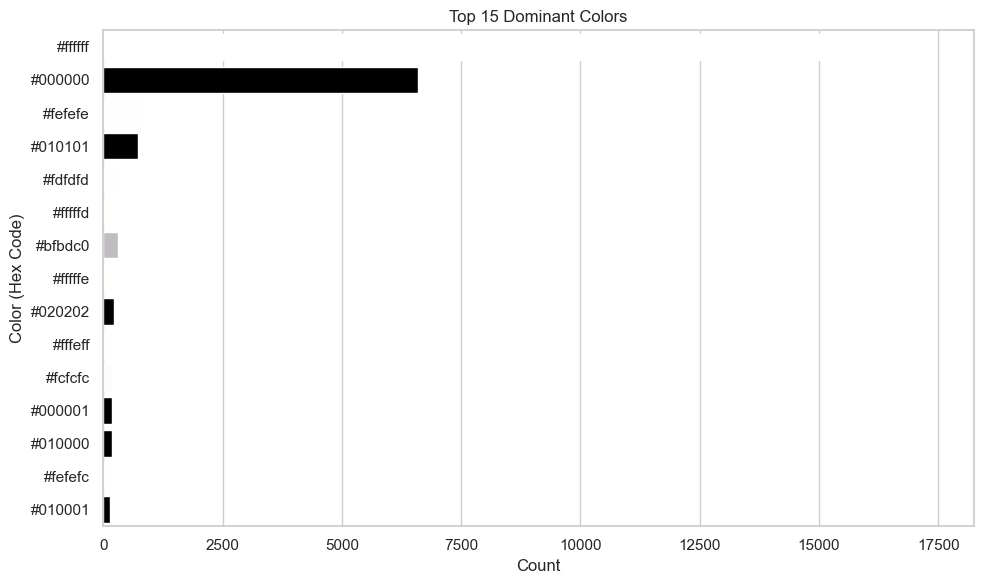

In [9]:
# Cell 8: Gráfico de barras - Top 15 cores dominantes
plt.figure(figsize=(10,6))

# Get the top 15 dominant colors
dominant_color_counts = df['dominant_color'].value_counts().head(15)

# Create the color list from the hex names (index of the Series)
color_palette = dominant_color_counts.index.tolist()

# Plot
sns.barplot(
    x=dominant_color_counts.values,
    y=dominant_color_counts.index,
    palette=color_palette
)

plt.title('Top 15 Dominant Colors')
plt.xlabel('Count')
plt.ylabel('Color (Hex Code)')
plt.tight_layout()
plt.show()


/var/folders/gw/xlj0k3j514bcjc1zdr412my80000gn/T/ipykernel_45045/2517297844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(


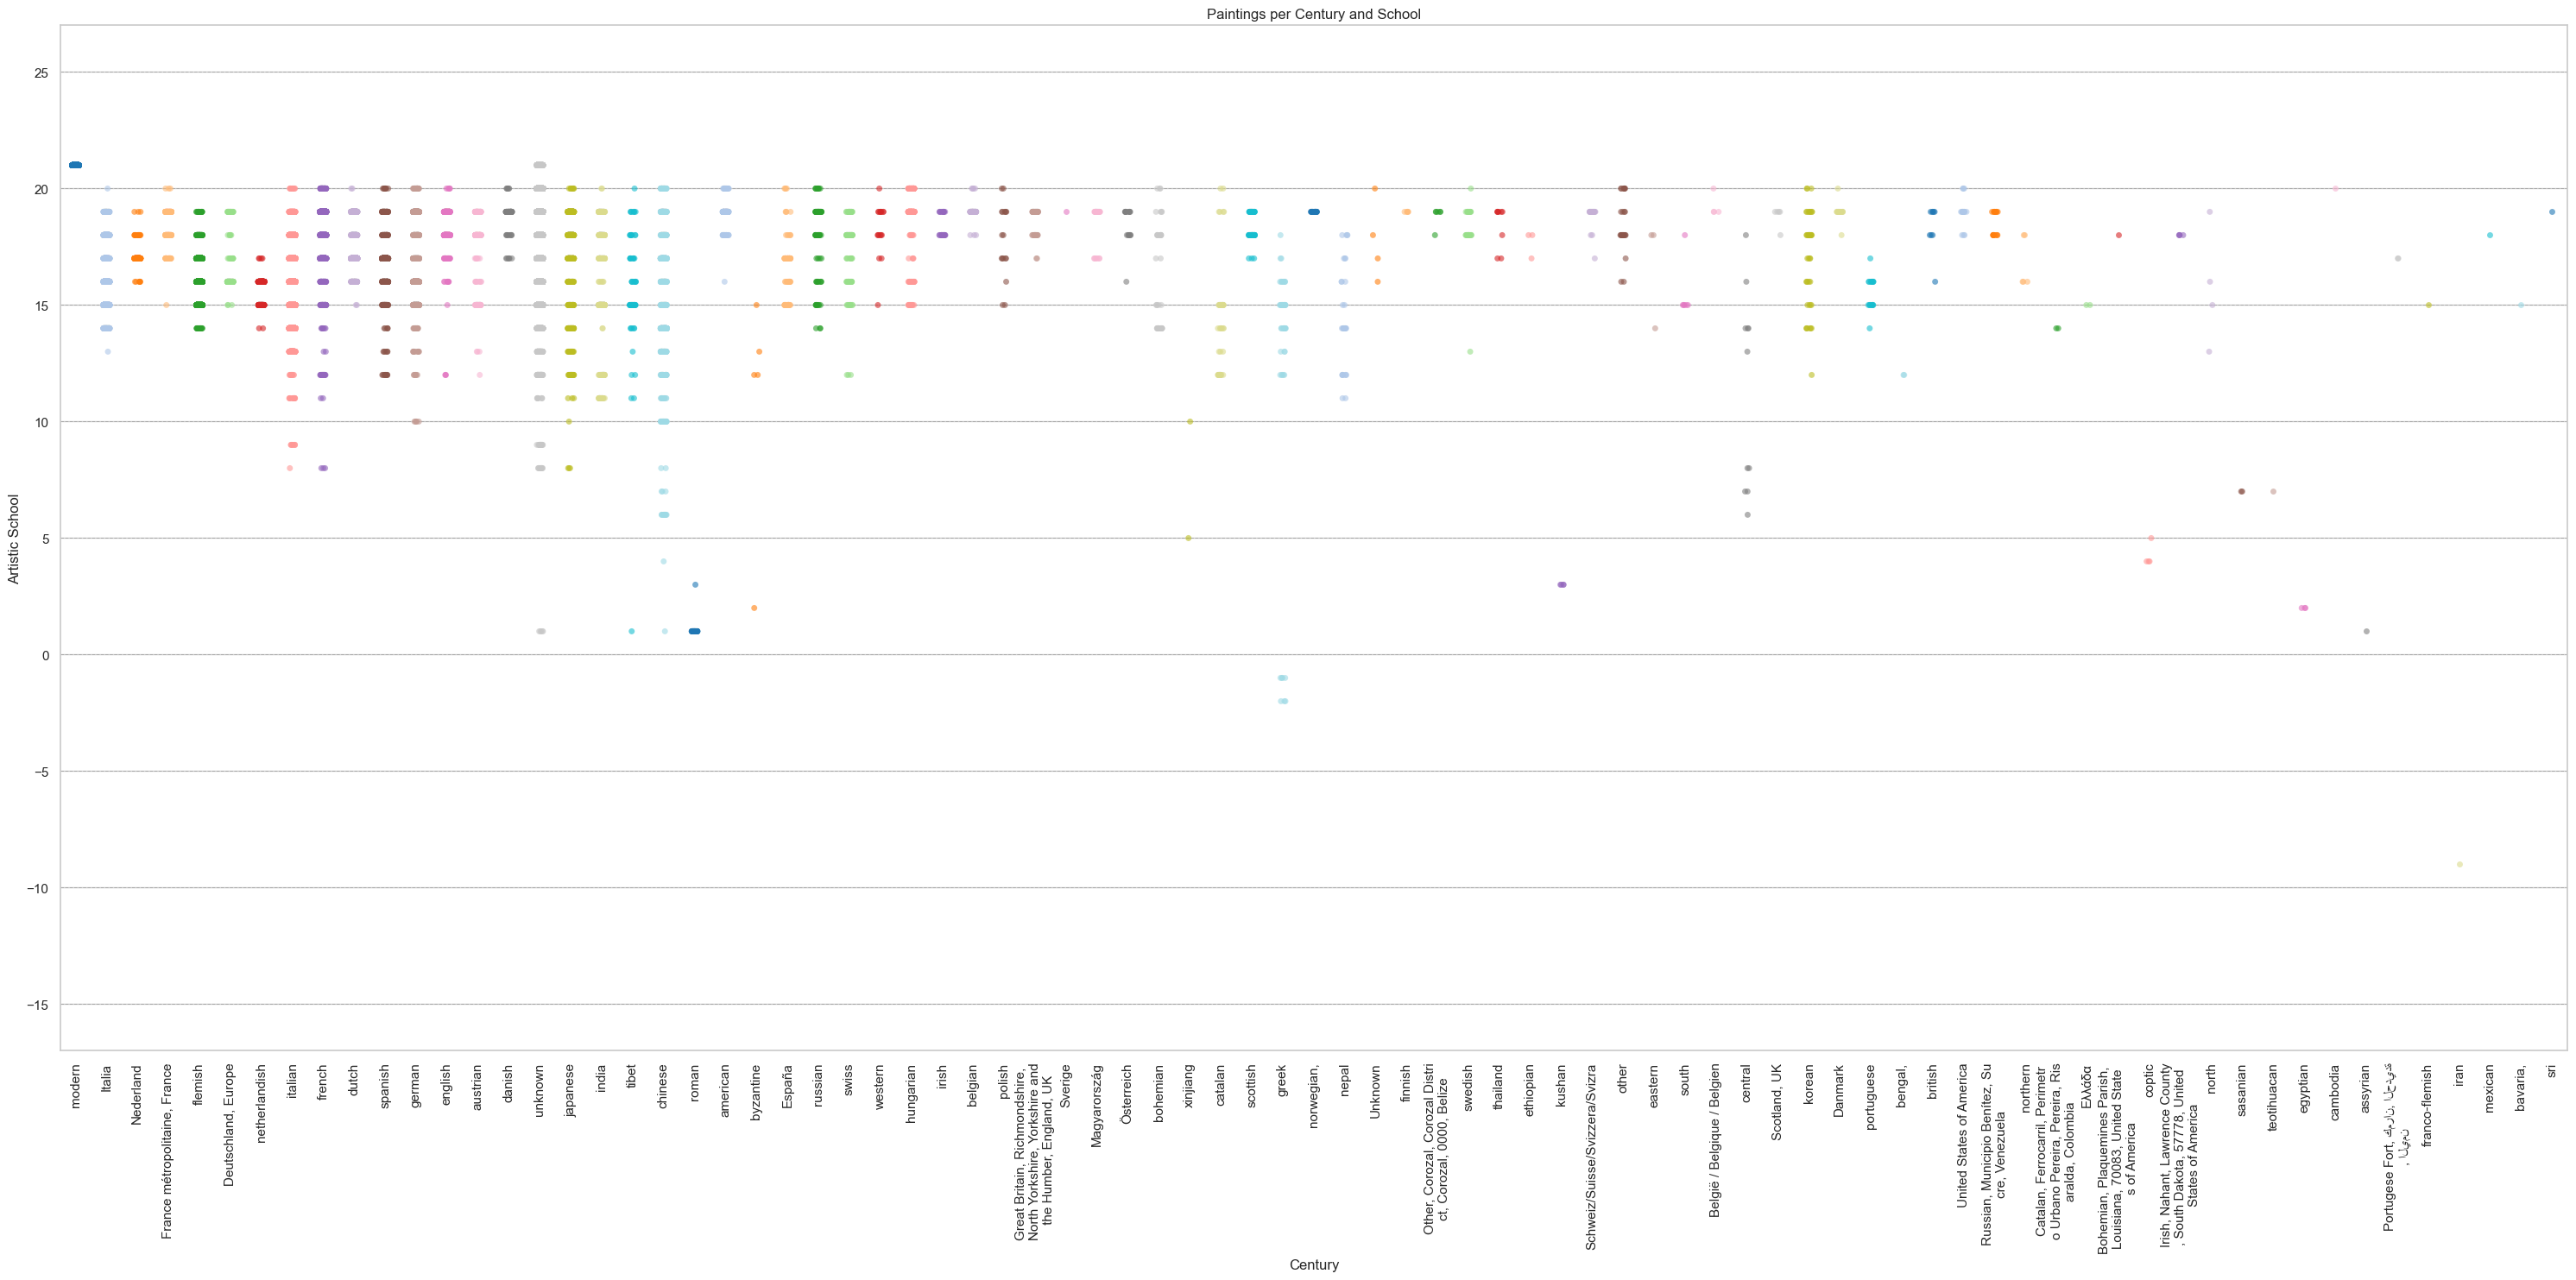

In [28]:
df['school_wrapped'] = df['school'].apply(
    lambda x: '\n'.join([str(x)[i:i+30] for i in range(0, len(str(x)), 30)]) if pd.notna(x) else 'Unknown'
)

plt.figure(figsize=(30, 15))
ax = sns.stripplot(
    data=df,
    x='school_wrapped',
    y='century',
    jitter=True,
    alpha=0.6,
    palette='tab20',
)

plt.title('Paintings per Century and School')
plt.xlabel('Century')
plt.ylabel('Artistic School')
plt.xticks(rotation=90)
y_ticks = ax.get_yticks()
for y in y_ticks:
    ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.7, alpha=0.5)
plt.tight_layout()
plt.show()
